In [1]:
import numpy as np


In [2]:
# # Define the model to use for tests, basic SIR

# modelFlows = {
#     'beta * S * I' : ['S','I'],
#     'gamma * I' : ['I',None]
# }

# varsMeta = ['S','I']
# parsMeta = ['beta','gamma']



In [3]:
# x = np.array([0.9,0.1])
# p1 = 2/7
# p2 = 1.5/7
# ps = [p1,p2]

# def testFunc(t,x,beta,gamma):

#     S,I = x 

#     dS = - beta * S * I 
#     dI = + beta * S * I - gamma * I 

#     return [dS,dI]

# testFunc(0,x,p1,p2)

In [4]:
# dxdt = np.zeros(x.shape)

# for i in range(len(varsMeta)):
#     vName = varsMeta[i]
#     exec(vName+' = x['+str(i)+']')
    
# for i in range(len(parsMeta)):
#     pName = parsMeta[i]
#     exec(pName+' = ps['+str(i)+']')


# allFlows = np.zeros(len(modelFlows))
# i = 0
# for key in modelFlows:
#     # curFlowVal = eval(key)
#     # print(f'{key}: {curFlowVal}')
#     allFlows[i] = eval(key)
#     i = i + 1

# for i in range(len(varsMeta)):
#     curVal = 0
#     curVarName = varsMeta[i]
#     for j in range(len(modelFlows)):
#         curFlow = list(modelFlows.items())[j]
#         curOut = curFlow[1][0]
#         curIn = curFlow[1][1]
#         if (curOut == curVarName):
#             curVal -= allFlows[j]
#         if (curIn == curVarName):
#             curVal += allFlows[j]
#     dxdt[i] = curVal

# dxdt


In [5]:
def curFunc(t,x,ps,modelFlows,varsMeta,parsMeta):

    # Go through variable names and get inputs
    for i in range(len(varsMeta)):
        vName = varsMeta[i]
        exec(vName+' = x['+str(i)+']')
        
    # Go through parameter names and save
    for i in range(len(parsMeta)):
        pName = parsMeta[i]
        exec(pName+' = ps['+str(i)+']')

    # Calculate the value of each current flow
    allFlows = np.zeros(len(modelFlows))
    i = 0
    for key in modelFlows:
        allFlows[i] = eval(key)
        i = i + 1

    # Initialize outputs as zero
    # dxdt = np.zeros(x.shape)
    dxdt = np.zeros(len(x))
    # Go through each variable
    for i in range(len(varsMeta)):
        # # Make sure the current output is zero
        # dxdt[i] = 0
        # Get the name of the current variable
        curVarName = varsMeta[i]
        # Go through each flow
        for j in range(len(modelFlows)):
            # Get the current flow
            curFlow = list(modelFlows.items())[j]
            # Identify inputs and outputs
            curOut = curFlow[1][0]
            curIn = curFlow[1][1]
            # If the flow is an output of the current variable, subtract the flow-value
            if (curOut == curVarName):
                dxdt[i] -= allFlows[j]
            # If the flow is an input of the current variable, add the flow-value
            if (curIn == curVarName):
                dxdt[i] += allFlows[j]

    return dxdt

# Make a shorter function call for use in solve_ivp
def ModelCallToReturn(t,x,*args,ModelMeta):
    modelFlows,varsMeta,parsMeta = ModelMeta
    return curFunc(t,x,args,modelFlows,varsMeta,parsMeta)


In [6]:
# ModelCallToReturn(0,x,p1,p2,p3,p4,p5)
# modelFlows = {
#     'beta * S * I' : ['S','I'],
#     'gamma * I' : ['I',None]
# }

# varsMeta = ['S','I']
# parsMeta = ['beta','gamma']

curFunc(0,
    [0.9,0.1],[1/7,2/7],{
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma'])
# modelFlows,varsMeta,parsMeta = ModelMeta

ModelCallToReturn(0,[0.9,0.1],1/7,2/7,ModelMeta=({
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma']))

array([-0.01285714, -0.01571429])

In [7]:
# Testing:

from scipy.integrate import solve_ivp

t0 = 0
tEnd = 100
TimeRange = np.arange(t0,tEnd) 
InitArray = [0.99,0.01]
# ParsArray = (p1,p2)
ParsArray = (2/7,1/7)


def testFunc(t,x,beta,gamma):

    S,I = x 

    dS = - beta * S * I 
    dI = + beta * S * I - gamma * I 

    return [dS,dI]

sol = solve_ivp(testFunc,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)
# sol2 = solve_ivp(ModelCallToReturn,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)
currentModel = type('Model', (), {})()
currentModel.ModelMeta = ({
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma'])

testMeta = ({
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma'])


sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)


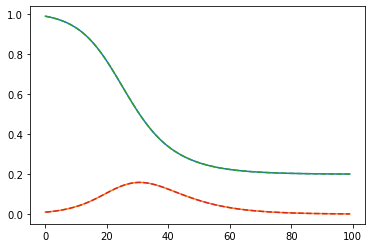

In [8]:
import matplotlib.pyplot as plt 

plt.figure() 
plt.plot(sol.t,sol.y[0,:])
plt.plot(sol.t,sol.y[1,:])
plt.plot(sol2.t,sol2.y[0,:],'--')
plt.plot(sol2.t,sol2.y[1,:],'--')

# Test some arbitrary models

In [9]:
# modelFlows = {
#     'alpha * X' : [None,'X'],
#     'beta * X * Y' : ['X',None],
#     'delta * X * Y' : [None,'Y'],
#     'gamma * Y' : ['Y',None],
#     # 'gamma * X * X' : ['X',None],
# }

# varsMeta = ['X','Y']
# parsMeta = ['alpha','beta','delta','gamma']



In [10]:
# t0 = 0
# tEnd = 500
# TimeRange = np.arange(t0,tEnd) 
# InitArray = [0.99,0.01]
# ParsArray = [0.1,0.2,0.4,0.1]


# curSol = solve_ivp(ModelCallToReturn,[t0,tEnd],InitArray,t_eval=TimeRange,args=ParsArray)

# plt.figure() 
# plt.plot(curSol.t,curSol.y[0,:],'--')
# plt.plot(curSol.t,curSol.y[1,:],'--')

In [11]:

## Arbitrary function definitions
def ArbitraryGillespieCall(t,x,ps,modelFlows,varsMeta,parsMeta):

    # Calculate sum of population
    N = np.sum(x)

    # Go through variable names and get inputs
    for i in range(len(varsMeta)):
        vName = varsMeta[i]
        exec(vName+' = x['+str(i)+']')
        # exec(vName+' = xNorm['+str(i)+']')
        
    # Go through parameter names and save
    for i in range(len(parsMeta)):
        pName = parsMeta[i]
        exec(pName+' = ps['+str(i)+']')

    # Calculate the value of each current flow
    allFlows = np.zeros(len(modelFlows))
    i = 0
    for key in modelFlows:
        allFlows[i] = eval(key)
        i = i + 1

    flowTot = allFlows.sum()
    
    if (flowTot == None):
        return 0,x 

    # print(f'flowTot: {flowTot}, x:{x}')

    r1 = np.random.rand()
    r2 = np.random.rand()
    
    timeStep = np.log(1/r1) / flowTot 

    # print(allFlows)
    # print(allFlows/flowTot)
    # print(np.cumsum(allFlows/flowTot))
    # curBounds = np.append(0,np.cumsum(allFlows/flowTot))
    curBounds = np.cumsum(allFlows/flowTot)
    # print(curBounds)

    xOut = x.copy()
    curReaction = None
    i = 0
    while (i < len(curBounds)):
        if (r2 < curBounds[i]):
            curReaction = i 
            i = len(curBounds)
        i += 1
    
    if (curReaction == None):
        return 0,x 

    reactionFlow = list(modelFlows)[curReaction]
    # print(reactionFlow)
    curToChange = modelFlows[reactionFlow]
    # print(curToChange)
    if (curToChange[0] != None):
        curOut = np.where(curToChange[0] == np.array(varsMeta))[0][0]
        xOut[curOut] -= 1
    if (curToChange[1] != None):
        curIn = np.where(curToChange[1] == np.array(varsMeta))[0][0]
        xOut[curIn] += 1

    return timeStep,xOut

    
testMeta = ({
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma'])


# ArbitraryGillespieCall(0,[0.99,0.01],(2/7,1/7),*testMeta)
# curInit =100* np.array([0.99,0.01])
testInit = [20000,1000]
ArbitraryGillespieCall(0,testInit,(2/7,1/7),*testMeta)



(3.7948053090079717e-07, [19999, 1001])

In [12]:
def multiGillespie(tInit,tEnd,xInit,pars,ModelMeta):
    
    allTs = [tInit]
    allXs = xInit 

    # popSum = np.sum(xInit) 

    curInit = xInit 
    curT = tInit 
    # for k in range(1000):
    while (curT < tEnd):
        
        # if (curInit[1] == 0):
        #     curT = tEnd
        # else:
        #     dt,curInit = ArbitraryGillespieCall(curT,curInit,pars,*ModelMeta)
        #     curT += dt

        #     allTs.append(curT) 
        #     allXs = np.vstack([allXs,curInit])
            
        # if (dt == 0):
        #     curT = tEnd
        # else: 
            
        #     dt,curInit = ArbitraryGillespieCall(curT,curInit,pars,*ModelMeta)
        #     curT += dt

        #     allTs.append(curT) 
        #     allXs = np.vstack([allXs,curInit])
            
        dt,curInit = ArbitraryGillespieCall(curT,curInit,pars,*ModelMeta)
        curT += dt

        allTs.append(curT) 
        allXs = np.vstack([allXs,curInit])
        
        if (dt == 0):
            curT = tEnd
    return allTs,np.array(allXs)

ts,xs = multiGillespie(0,10,[99,10],(1/70,1/7),testMeta)

In [13]:

testInit = [999,10]
N = np.sum(testInit)

allXs = [] 
allTs = []

for k in range(20):
    # ts,xs = multiGillespie(0,10,testInit,(0.01*2/7,1/7),testMeta)
    ts,xs = multiGillespie(0,100,testInit,((1/N)*2/7,1/7),testMeta)

    allTs.append(ts)
    allXs.append(xs)

odeInit = testInit/N

TimeRange=np.linspace(0,100)
# sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[0,10],testInit,t_eval=TimeRange,args=ParsArray)
sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[TimeRange[0],TimeRange[-1]],odeInit,t_eval=TimeRange,args=(2/7,1/7))

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_40936\3809830222.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  timeStep = np.log(1/r1) / flowTot
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_40936\3809830222.py:41: RuntimeWarning: invalid value encountered in true_divide
  curBounds = np.cumsum(allFlows/flowTot)


In [14]:
tRange = np.arange(TimeRange[0],TimeRange[-1],0.1)

IsInterp = [] 
for k in range(len(allTs)):
    curI = allXs[k][:,1]

    curInterp = np.interp(tRange,allTs[k],curI)

    IsInterp.append(curInterp)


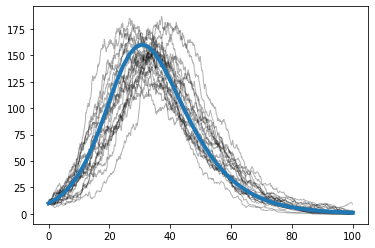

In [15]:

plt.figure()
for k in range(len(allTs)):
    ts = allTs[k]
    xs = allXs[k]
    # plt.plot(ts,xs[:,1],'k',linewidth=1,alpha=0.3)
    curInterp = IsInterp[k]
    plt.plot(tRange,curInterp,'k',linewidth=1,alpha=0.3)
plt.plot(TimeRange,N*sol2.y[1,:],linewidth=4)

In [16]:
# odeInit = testInit/N

# TimeRange=np.linspace(0,100)
# # sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[0,10],testInit,t_eval=TimeRange,args=ParsArray)
# sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[TimeRange[0],TimeRange[-1]],odeInit,t_eval=TimeRange,args=(2/7,1/7))

# plt.figure()
# plt.plot(TimeRange,sol2.y[1,:])

In [17]:
modelFlows = {
    'alpha * X' : [None,'X'],
    'beta * X * Y' : ['X',None],
    'delta * X * Y' : [None,'Y'],
    'gamma * Y' : ['Y',None],
}

varsMeta = ['X','Y']
parsMeta = ['alpha','beta','delta','gamma']

testMeta = (modelFlows,varsMeta,parsMeta)

testInit = [999,10]
N = np.sum(testInit)
testPars = [0.1,0.1/N,0.1/N,0.1]
testPars_ode = np.array([0.1,0.1,0.1,0.1])
N = np.sum(testInit)

allXs = [] 
allTs = []

for k in range(20):
    # ts,xs = multiGillespie(0,10,testInit,(0.01*2/7,1/7),testMeta)
    ts,xs = multiGillespie(0,100,testInit,testPars,testMeta)

    allTs.append(ts)
    allXs.append(xs)

odeInit = testInit/N

TimeRange=np.linspace(0,100)
# sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[0,10],testInit,t_eval=TimeRange,args=ParsArray)
sol2 = solve_ivp(lambda t,x,*args: ModelCallToReturn(t,x,*args,ModelMeta=testMeta),[TimeRange[0],TimeRange[-1]],odeInit,t_eval=TimeRange,args=testPars)

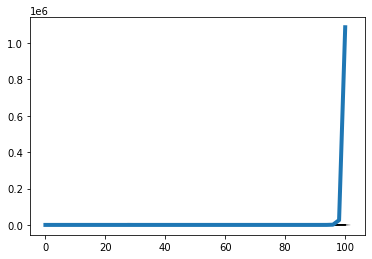

In [18]:

plt.figure()
for k in range(len(allTs)):
    ts = allTs[k]
    xs = allXs[k]
    plt.plot(ts,xs[:,1],'k',linewidth=1,alpha=0.3)
    # curInterp = IsInterp[k]
    # plt.plot(tRange,curInterp,'k',linewidth=1,alpha=0.3)
plt.plot(TimeRange,N*sol2.y[1,:],linewidth=4)